# Pymaceuticals Inc.
---

### Analysis 

In [235]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from pathlib import Path

In [236]:
# Study data files
mouse_metadata_path = Path("data", "Mouse_metadata.csv")
study_results_path = Path("data", "Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [237]:
# Checking the number of (unique) mice.
mouse_study_df['Mouse ID'].nunique()

249

In [238]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_groupby = mouse_study_df.groupby(['Mouse ID', 'Timepoint']).size()
duplicates = duplicate_groups[duplicate_groupby > 1]
duplicates

Mouse ID  Timepoint
g989      0            2
          5            2
          10           2
          15           2
          20           2
dtype: int64

In [239]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_df[mouse_study_df['Mouse ID'].str.fullmatch('g989')]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [240]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study_df.loc[~mouse_study_df['Mouse ID'].str.fullmatch('g989')]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [241]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [242]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_group = clean_df.groupby('Drug Regimen')

summary_table = pd.DataFrame({
    "Mean Tumor Volume": drug_group['Tumor Volume (mm3)'].mean(),
    "Median Tumor Volume": drug_group['Tumor Volume (mm3)'].median(),
    "Tumor Volume Variance": drug_group['Tumor Volume (mm3)'].var(),
    "Tumor Volume Std. Dev.": drug_group['Tumor Volume (mm3)'].std(),
    "Tumor Volume Std. Err.": drug_group['Tumor Volume (mm3)'].sem()
})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [243]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_group['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

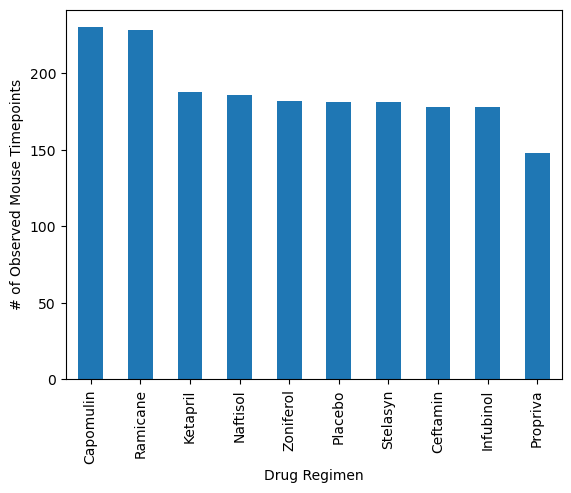

In [244]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = drug_group['Mouse ID'].count().sort_values(ascending=False)

mice_plot = mice_count.plot.bar(x=mice_count)
mice_plot.set_ylabel("# of Observed Mouse Timepoints")
plt.show()

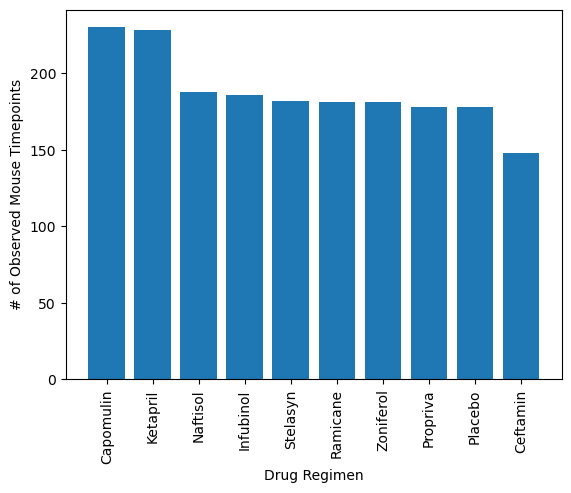

In [245]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs = list(clean_df['Drug Regimen'].unique())

plt.bar(drugs, mice_count)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

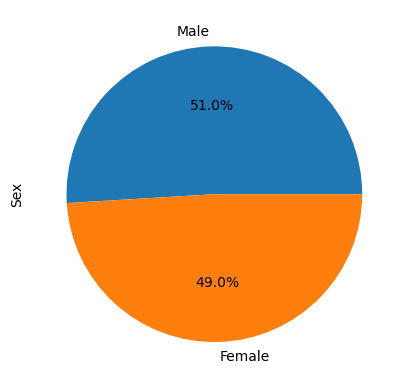

In [246]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sexes = list(clean_df['Sex'].unique())
sex_group = clean_df.groupby('Sex')
mice_count = sex_group['Sex'].count().sort_values(ascending=False)

mice_count.plot.pie(x=mice_count, autopct="%1.1f%%")
plt.show()

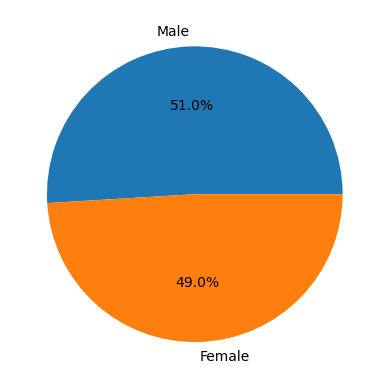

In [247]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexes = list(clean_df['Sex'].unique())
sex_group = clean_df.groupby('Sex')
mice_count = sex_group['Sex'].count().sort_values(ascending=False)
labels = ['Male', 'Female']

plt.pie(mice_count, labels=labels, autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [248]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
regimen_group = clean_df.groupby(['Drug Regimen', 'Mouse ID'])

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = regimen_group['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
regimens_df = pd.merge(pd.DataFrame({'Last Timepoint': last_timepoint}), clean_df, on="Mouse ID", how="left")
regimens_df

,Mouse ID,Last Timepoint,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,0,45.000000,0,Capomulin,Female,9,22
1,b128,45,5,45.651331,0,Capomulin,Female,9,22
2,b128,45,10,43.270852,0,Capomulin,Female,9,22
3,b128,45,15,43.784893,0,Capomulin,Female,9,22
4,b128,45,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...,...
1875,w575,45,45,68.401286,3,Zoniferol,Female,16,28
1876,x613,15,0,45.000000,0,Zoniferol,Female,2,29
1877,x613,15,5,46.097041,0,Zoniferol,Female,2,29
1878,x613,15,10,46.818176,0,Zoniferol,Female,2,29


In [249]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    series = regimens_df[regimens_df['Drug Regimen'].str.fullmatch(regimen)]['Tumor Volume (mm3)']
    iqr = st.iqr(series)
    
    # add subset 

    # Determine outliers using upper and lower bounds
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    lower_bound = Q1 - (1.5 * iqr)
    upper_bound = Q3 + (1.5 * iqr)
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    print(f"{regimen}'s potential outliers:\n{outliers}")
    print()

Capomulin's potential outliers:
155    25.472143
156    23.343598
Name: Tumor Volume (mm3), dtype: float64

Ramicane's potential outliers:
1425    22.050126
Name: Tumor Volume (mm3), dtype: float64

Infubinol's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Ceftamin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)



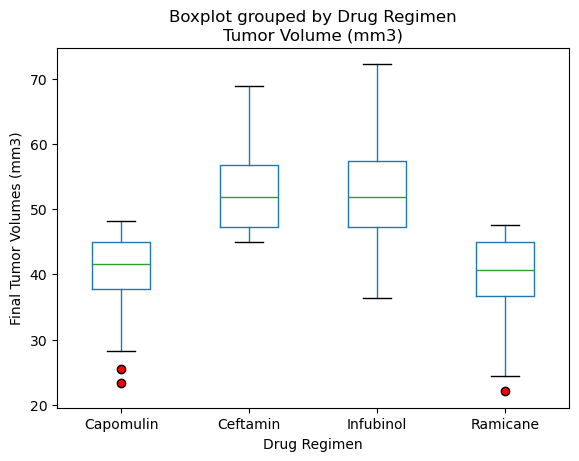

In [250]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
regimens_re = "Capomulin|Ramicane|Infubinol|Ceftamin"
filtered_df = regimens_df[regimens_df['Drug Regimen'].str.match(regimens_re)]

filtered_df.boxplot(
    column=['Tumor Volume (mm3)'],
    by='Drug Regimen',
    grid=False,
    flierprops={'markerfacecolor': 'red'}
)

plt.ylabel("Final Tumor Volumes (mm3)")
plt.show()

## Line and Scatter Plots

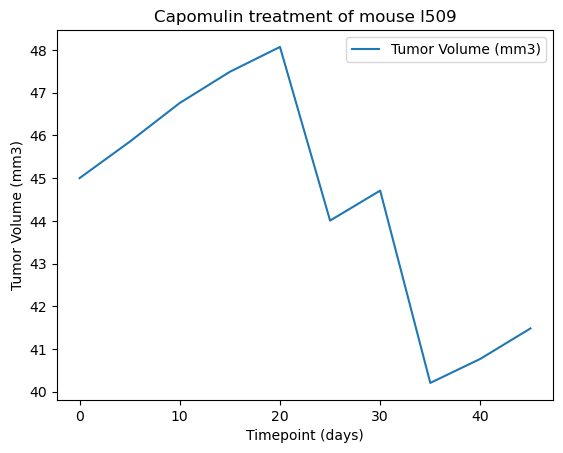

In [252]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509_capomulin_df = regimens_df[regimens_df['Mouse ID'].str.fullmatch('l509') & regimens_df['Drug Regimen'].str.fullmatch('Capomulin')]

l509_capomulin_df.plot(x='Timepoint', y='Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

## Correlation and Regression

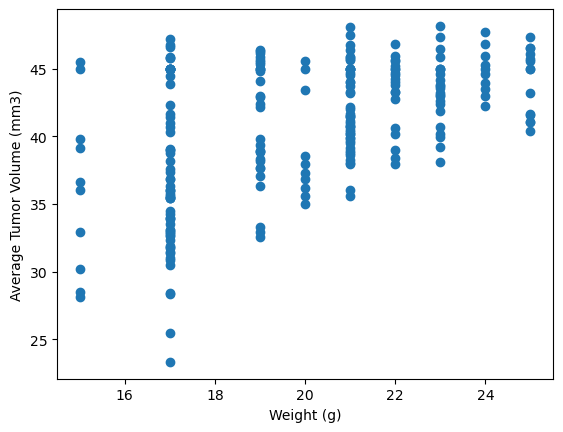

In [253]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

x_values = capomulin_df['Weight (g)']
y_values = capomulin_df['Tumor Volume (mm3)']

plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

The correlation between mouse weight and the average tumor volume is 0.53


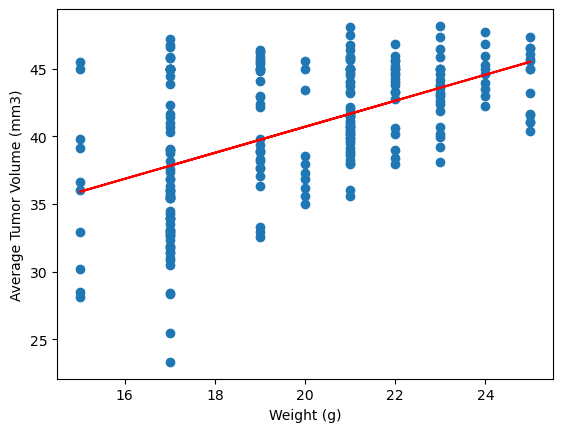

In [254]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capomulin_df['Weight (g)'],capomulin_df['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values = capomulin_df['Weight (g)']
y_values = capomulin_df['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()